In [1]:
#In our outline each country is plotted using its land used farming for each crop (measured in hectares)
#graphed against its yield (measured in kg/km) with NUE (measured as a percentage) corresponding to the
#size of the bubbles. Each crop can be viewed with its NUE for each country, the amount grown,
#and the amount of land used in the process.
import scipy.io
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sb
import matplotlib.animation as ani
from matplotlib.animation import FuncAnimation
iFarmData = scipy.io.loadmat('iFarmData(2015)_1_28_2019.mat')
from IPython import display

In [2]:
Years = pd.DataFrame(iFarmData['Yr']).T
Countries = pd.DataFrame(iFarmData['FAOSTAT_CoName_FAO'])
CropNames = pd.DataFrame(iFarmData['FAOSTAT_CrName_FAO'])
China=Countries[Countries[0] == 'China'].index[0]
UnitedStates=Countries[Countries[0] == 'United States of America'].index[0]
India=Countries[Countries[0] == 'India'].index[0]
Brazil=Countries[Countries[0] == 'Brazil'].index[0]
Rice=CropNames[CropNames[0] == 'Rice; paddy'].index[0]
Maize=CropNames[CropNames[0] == 'Maize'].index[0]
Wheat=CropNames[CropNames[0] == 'Wheat'].index[0]

In [3]:
%matplotlib inline
#index=0
#ChinaRiceNUE = pd.DataFrame(iFarmData['NUE_3d'][China, Rice]).iloc[44: 54]
#ChinaRiceYield = pd.DataFrame(iFarmData["Yield_FAO"][China, Rice]).iloc[44: 54]
#ChinaRiceArea = pd.DataFrame(iFarmData["AreaH_FAO"][China, Rice]).iloc[44: 54]
#USRiceNUE = pd.DataFrame(iFarmData['NUE_3d'][UnitedStates, Rice]).iloc[44: 54]
#USRiceYield = pd.DataFrame(iFarmData["Yield_FAO"][UnitedStates, Rice]).iloc[44: 54]
#USRiceArea = pd.DataFrame(iFarmData["AreaH_FAO"][UnitedStates, Rice]).iloc[44: 54]
#ChinaMaizeNUE = pd.DataFrame(iFarmData['NUE_3d'][China, Maize]).iloc[44: 54]
#ChinaMaizeYield = pd.DataFrame(iFarmData["Yield_FAO"][China, Maize]).iloc[44: 54]
#ChinaMaizeArea = pd.DataFrame(iFarmData["AreaH_FAO"][China, Maize]).iloc[44: 54]
#USMaizeNUE = pd.DataFrame(iFarmData['NUE_3d'][UnitedStates, Maize]).iloc[44: 54]
#USMaizeYield = pd.DataFrame(iFarmData["Yield_FAO"][UnitedStates, Maize]).iloc[44: 54]
#USMaizerea = pd.DataFrame(iFarmData["AreaH_FAO"][UnitedStates, Maize]).iloc[44: 54]
RiceNUE = pd.DataFrame(iFarmData['NUE_3d'][:, Rice])
RiceYield = pd.DataFrame(iFarmData["Yield_FAO"][:, Rice])
RiceArea = pd.DataFrame(iFarmData["AreaH_FAO"][:, Rice])
WheatNUE = pd.DataFrame(iFarmData['NUE_3d'][:, Wheat])
WheatYield = pd.DataFrame(iFarmData["Yield_FAO"][:, Wheat])
WheatArea = pd.DataFrame(iFarmData["AreaH_FAO"][:, Wheat])
MaizeNUE = pd.DataFrame(iFarmData['NUE_3d'][:, Maize])
MaizeYield = pd.DataFrame(iFarmData["Yield_FAO"][:, Maize])
MaizeArea = pd.DataFrame(iFarmData["AreaH_FAO"][:, Maize])
Legend = ["China, Rice", "United States, Rice", "India, Rice", "China, Wheat", "United States, Wheat", "India, Wheat", "China, Maize (Corn)", "United States, Maize (Corn)", "India, Maize (Corn)"]

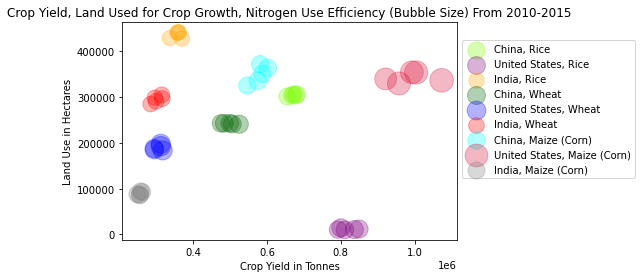

In [4]:
#plt.scatter(x=ChinaRiceYield, y=ChinaRiceArea, s=ChinaRiceNUE*500, alpha=0.5)
#plt.scatter(x=USRiceYield, y=USRiceArea, s=USRiceNUE*500, alpha=0.5)
plt.title("Crop Yield, Land Used for Crop Growth, Nitrogen Use Efficiency (Bubble Size) From 2010-2015")
plt.xlabel("Crop Yield in Tonnes")
plt.ylabel("Land Use in Hectares")
plt.scatter(x=RiceYield.iloc[China].iloc[49: 54], y=RiceArea.iloc[China].iloc[49: 54], s=RiceNUE.iloc[China].iloc[49: 54]*750, alpha=0.3, c=['lawngreen'])
plt.scatter(x=RiceYield.iloc[UnitedStates].iloc[49: 54], y=RiceArea.iloc[UnitedStates].iloc[49: 54], s=RiceNUE.iloc[UnitedStates].iloc[49: 54]*750, alpha=0.3, c=['purple'])
plt.scatter(x=RiceYield.iloc[India].iloc[49: 54], y=RiceArea.iloc[India].iloc[49: 54], s=RiceNUE.iloc[India].iloc[49: 54]*750, alpha=0.3, c=['orange'])
plt.scatter(x=WheatYield.iloc[China].iloc[49: 54], y=WheatArea.iloc[China].iloc[49: 54], s=WheatNUE.iloc[China].iloc[49: 54]*750, alpha=0.3, c=['darkgreen'])
plt.scatter(x=WheatYield.iloc[UnitedStates].iloc[49: 54], y=WheatArea.iloc[UnitedStates].iloc[49: 54], s=WheatNUE.iloc[UnitedStates].iloc[49: 54]*750, alpha=0.3, c=['blue'])
plt.scatter(x=WheatYield.iloc[India].iloc[49: 54], y=WheatArea.iloc[India].iloc[49: 54], s=WheatNUE.iloc[India].iloc[49: 54]*750, alpha=0.3, c=['red'])
plt.scatter(x=MaizeYield.iloc[China].iloc[49: 54], y=MaizeArea.iloc[China].iloc[49: 54], s=MaizeNUE.iloc[China].iloc[49: 54]*750, alpha=0.3, c=['aqua'])
plt.scatter(x=MaizeYield.iloc[UnitedStates].iloc[49: 54], y=MaizeArea.iloc[UnitedStates].iloc[49: 54], s=MaizeNUE.iloc[UnitedStates].iloc[49: 54]*750, alpha=0.3, c=['crimson'])
plt.scatter(x=MaizeYield.iloc[India].iloc[49: 54], y=MaizeArea.iloc[India].iloc[49: 54], s=MaizeNUE.iloc[India].iloc[49: 54]*750, alpha=0.3, c=['gray'])
lgd = plt.legend(Legend, loc='center left', bbox_to_anchor=(1, 0.6))

In [9]:
from matplotlib import animation
from itertools import count
fig = plt.figure()
AreaChina= iFarmData['AreaH_FAO'][China, Maize]
YieldChina = iFarmData['Yield_FAO'][China, Maize]
NUEChina = iFarmData['NUE_3d'][China, Maize]
AreaUS= iFarmData['AreaH_FAO'][UnitedStates, Maize]
YieldUS = iFarmData['Yield_FAO'][UnitedStates, Maize]
NUEUS = iFarmData['NUE_3d'][UnitedStates, Maize]
xC,yC,sC, xU, yU, sU = [], [], [], [], [], []
#axes = fig.add_subplot(1,1,1)
#lines = plt.plot([])
#line = lines[0]
Cn = ["China, Maize (Corn)", "United States, Maize (Corn)"]
#fig(figsize=(8, 6), dpi=300)

def animate(frame):
    xC.append(YieldChina[frame])
    yC.append(AreaChina[frame])
    sC.append(NUEChina[frame]*500)
    xU.append(YieldUS[frame])
    yU.append(AreaUS[frame])
    sU.append(NUEUS[frame]*500)
    plt.ticklabel_format(useOffset=False, style='plain')
    plt.legend(Cn, loc='center left', bbox_to_anchor=(1, 0.6))
    plt.title("Crop Yield, Land Used for Crop Growth, Nitrogen Use Efficiency (NUE Shown by Bubble Size) | From 1960-2015")
    plt.xlabel("Crop Yield in Tonnes")
    plt.ylabel("Land Use in Hectares")
    plt.scatter(xC, yC, sC, alpha=0.25, c=['b'])
    plt.scatter(xU, yU, sU, alpha=0.25, c=['r'])

anim = FuncAnimation(fig, animate, frames=100, interval=60)
#anim.save(r'C:\Users\joshu\Desktop\ChinaUSMaizeHD.gif', dpi=275)

In [6]:
%matplotlib qt

In [11]:
AreaChina = iFarmData['AreaH_FAO'][China]
print(AreaChina[Wheat])

[255677.59 240713.71 237645.12 253915.11 246961.27 239085.07 252858.91
 246407.24 251416.68 254350.11 256150.36 262766.72 264123.86 270343.04
 276342.76 283805.02 280375.66 291841.59 293209.77 291911.37 282790.19
 279280.16 290511.1  295774.81 292190.53 296171.34 287992.24 287856.6
 298421.87 307542.85 309490.62 304972.1  302364.1  289819.66 288613.15
 296110.57 300570.2  297751.67 288550.19 266533.26 246640.68 239080.72
 219970.75 216260.74 227924.62 236130.67 237210.7  236172.66 242910.81
 242579.   242722.45 242703.11 241193.35 240716.29 241445.16]


In [73]:
#plt.plot(iFarmData['NUE_3d'][China, Rice])

In [ ]:
fig = plt.figure()
AreaChina = iFarmData['AreaH_FAO'][China, Maize]
YieldChinaMaize = iFarmData['Yield_FAO'][China, Maize]
NUEChinaMaize = iFarmData['NUE_3d'][China, Maize]
xCM,yCM,sCM, xCW, yCW, sCW, xCR, yCR, sCR = [], [], [], [], [], [], [], [], []
#axes = fig.add_subplot(1,1,1)
#lines = plt.plot([])
#line = lines[0]
Cn = ["China, Maize (Corn)", "China, Wheat, China Rice"]
#fig(figsize=(8, 6), dpi=300)

def animate(frame):
    xCM.append(YieldChinaMaize[frame])
    yCM.append(AreaChinaMaize[frame])
    sCM.append(NUEChinaMaize[frame]*500)
    xCM.append(YieldChinaMaize[frame])
    yCM.append(AreaChinaMaize[frame])
    sCM.append(NUEChinaMaize[frame]*500)
    plt.ticklabel_format(useOffset=False, style='plain')
    plt.legend(Cn, loc='center left', bbox_to_anchor=(1, 0.6))
    plt.title("Crop Yield, Land Used for Crop Growth, Nitrogen Use Efficiency (NUE Shown by Bubble Size) | From 1960-2015")
    plt.xlabel("Crop Yield in Tonnes")
    plt.ylabel("Land Use in Hectares")
    plt.scatter(xC, yC, sC, alpha=0.25, c=['b'])
    plt.scatter(xU, yU, sU, alpha=0.25, c=['r'])

anim = FuncAnimation(fig, animate, frames=100, interval=60)
#anim.save(r'C:\Users\joshu\Desktop\ChinaUSMaizeHD.gif', dpi=275)